# Find Stars with Photutils &#x1F31F; &#x2728;
just kidding this is clickbait

Index: 
1. Photutils
2. A little about the algorithm in play
3. Let's hunt some stars
4. While we are at it, let's do aperture photometry as well
5.  Use cases of DaoStarFinder

## Photutils 

Photutils is a python package coordinated by the Astropy Project for commonly used tools for detecting and performing photometry of astronomical sources. 

Some tools that we will be using today: 

- `Background Estimation`
- `Finding Stars`
- `Aperture Photometry`
- `Datasets and Simulations`

In [12]:
import numpy as np
import matplotlib.pyplot as plt

red = 'data/M66_mosaic_uvis_f814w_drc_sci.fits'
green = 'data/M66_mosaic_uvis_f555w_drc_sci.fits'
blue = 'data/M66_mosaic_uvis_f438w_drc_sci.fits'

## A little about the algorithm in play

In [13]:
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder

In [14]:
data = fits.getdata(red)
fwhm = 0.3              # in arcseconds
pixtoarcs = 0.0396      # arcsec/pix for WFC3

mean, median, std = sigma_clipped_stats(data, sigma=5)
daofind = DAOStarFinder(fwhm=fwhm/pixtoarcs, threshold=5*std)
objects = daofind(data)

In [15]:
from photutils.aperture import CircularAperture

In [16]:
from photutils.datasets import *

In [19]:
def find_stars(data, fwhm, std_multiple=5., sigma=3.0):
    mean, median, std = sigma_clipped_stats(data, sigma=sigma)
    daofind = DAOStarFinder(fwhm=3.0, threshold=std_multiple*std)
    sources = daofind(data - median)
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    print(f"Number of stars found: {len(positions)}")
    apertures = CircularAperture(positions, r=4)
    # norm = ImageNormalize(stretch=SqrtStretch())
    plt.imshow(data,
               cmap='Greys',
               origin='lower',
            #    norm=norm,
               interpolation='nearest')
    apertures.plot(color='blue', lw=1.5, alpha=0.5)

# `load_simulated_hst_star_image`

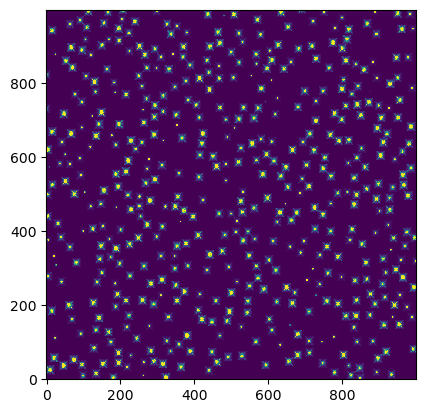

In [ ]:
# Note: the simulated image does not contain any background noise
hdu = load_simulated_hst_star_image(True)
plt.imshow(hdu.data, origin='lower', interpolation='nearest',
          vmax=10)

Number of stars found: 456


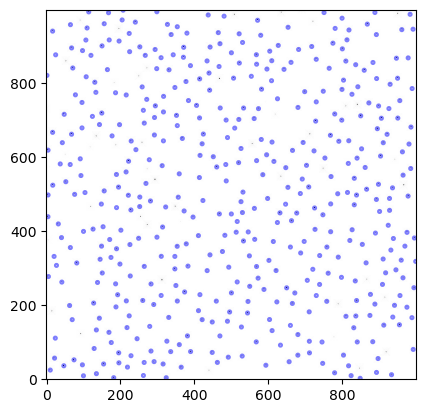

In [157]:
image = hdu.data#[0:401, 0:401]
find_stars(data=image, fwhm=0.5, std_multiple=100)

# `load_spitzer_image()`

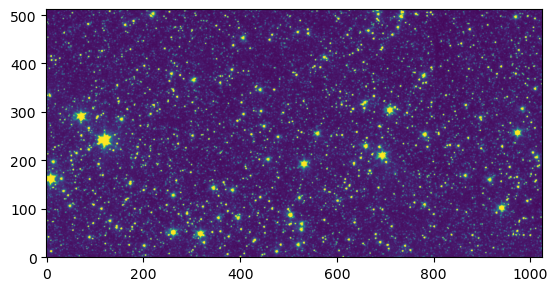

In [11]:
hdu = load_spitzer_image()
image = hdu.data
plt.imshow(image, origin='lower', vmax=50)

Number of stars found: 420


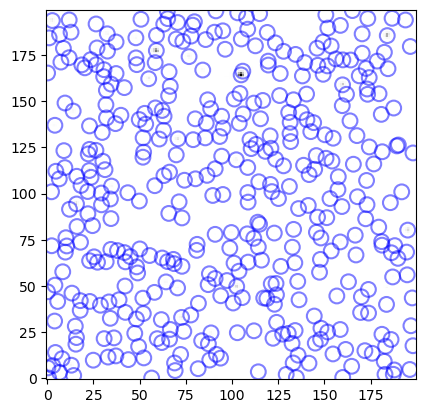

In [20]:
# plt.imshow(image[200:400, 200:400], vmax=50)
# plt.show()
find_stars(data=image[200:400, 200:400], fwhm=3.0)

# `load_star_image`

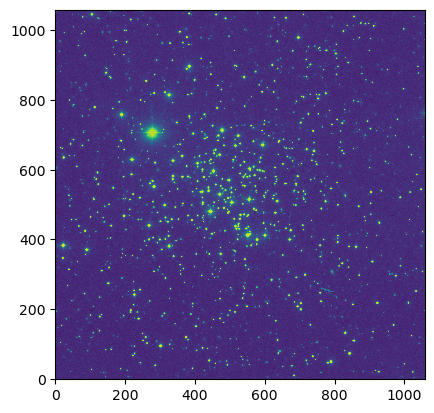

Number of stars found: 2262


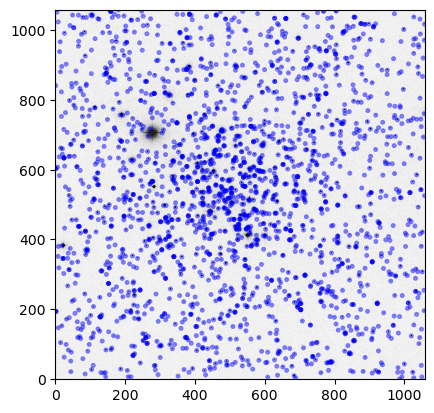

In [21]:
hdu = load_star_image(True)
plt.imshow(hdu.data, origin='lower', interpolation='nearest')
plt.show()
find_stars(hdu.data, fwhm=3.0)

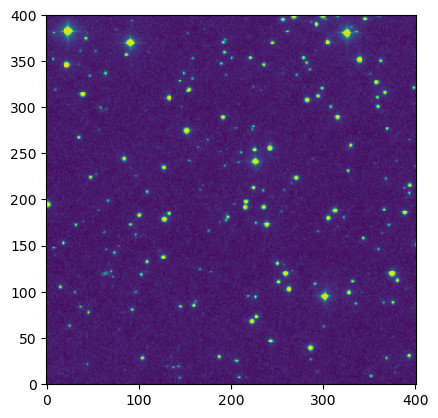

In [31]:
plt.imshow(hdu.data[0:401, 0:401], origin='lower', interpolation='nearest')

# `make_100gaussians_image`

This was super quick

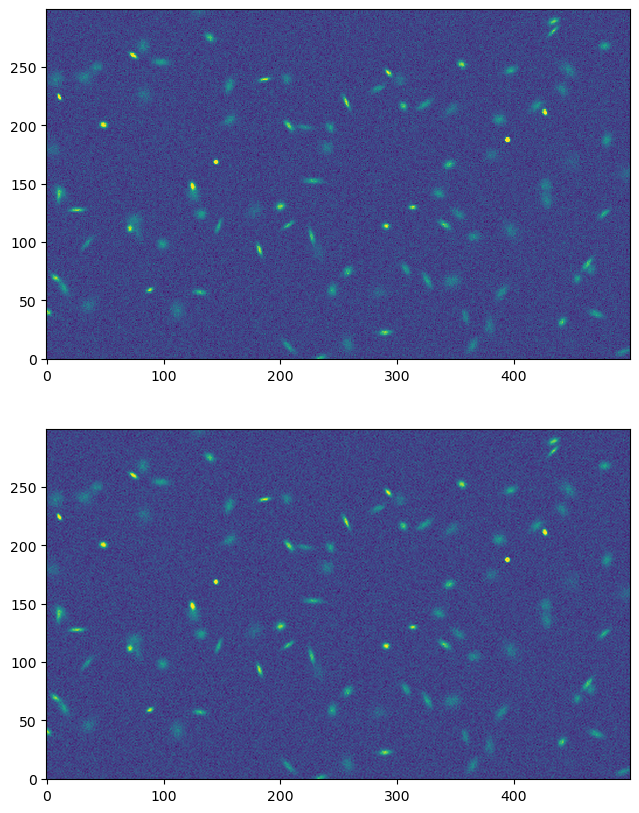

In [53]:
image = make_100gaussians_image(noise=True)
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax1.imshow(image, origin='lower', interpolation='nearest', vmax=40)
ax2.imshow(image, origin='lower', interpolation='lanczos', vmax=40)

# `make_model_image`

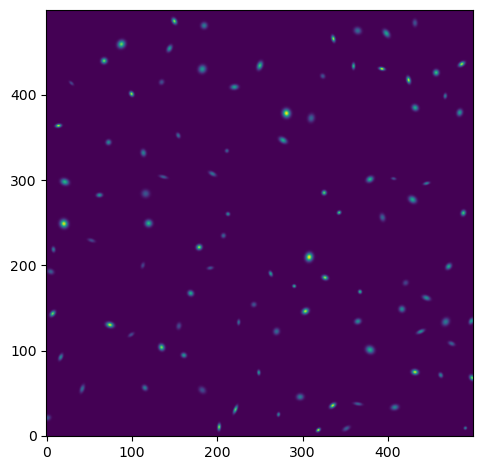

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.models import Gaussian2D
from photutils.datasets import make_model_image, make_model_params

model = Gaussian2D()
shape = (500, 500)
n_sources = 100
params = make_model_params(shape, n_sources, x_name='x_mean',
                           y_name='y_mean', min_separation=25,
                           amplitude=(100, 500), x_stddev=(1, 3),
                           y_stddev=(1, 3), theta=(0, np.pi))
model_shape = (25, 25)
data = make_model_image(shape, model, params, model_shape=model_shape,
                        x_name='x_mean', y_name='y_mean')

plt.imshow(data, origin='lower')
plt.tight_layout()

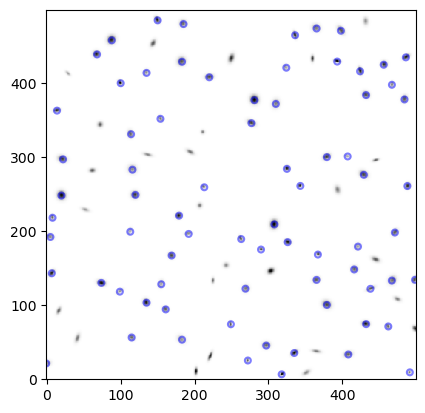

In [125]:
from astropy.visualization import simple_norm
mean, median, std = sigma_clipped_stats(data, sigma=1)
daofind = DAOStarFinder(fwhm=0.1, threshold=-5*std)
sources = daofind(data - median)

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.0)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
            interpolation='nearest')
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.show()